<a href="https://colab.research.google.com/github/Nikerlas/AI/blob/main/AI_NeuralNetworkKlasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv("6 class csv.csv")
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [36]:
print(df.isna().sum())

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64


In [37]:
df['Star color'] = df['Star color'].astype('category').cat.codes
df['Spectral Class'] = df['Spectral Class'].astype('category').cat.codes

df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,10,5
1,3042,0.000500,0.1542,16.60,0,10,5
2,2600,0.000300,0.1020,18.70,0,10,5
3,2800,0.000200,0.1600,16.65,0,10,5
4,1939,0.000138,0.1030,20.06,0,10,5


<Axes: >

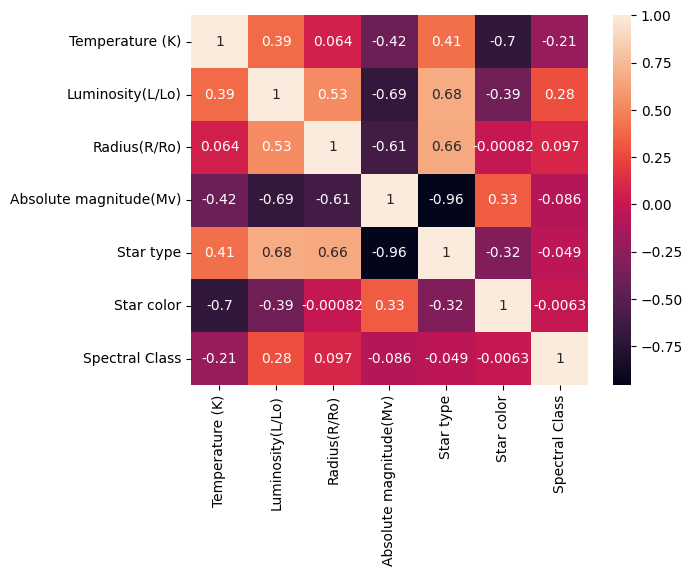

In [38]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True)

In [39]:
# Hitung korelasi antara semua fitur dengan target "star type"
correlation = df.corr()['Star type'].drop('Star type')  # Hapus korelasi dengan dirinya sendiri

# Tampilkan fitur dengan korelasi tertinggi (pengaruh terbesar)
print(correlation.abs().sort_values(ascending=False))

Absolute magnitude(Mv)    0.955276
Luminosity(L/Lo)          0.676845
Radius(R/Ro)              0.660975
Temperature (K)           0.411129
Star color                0.317103
Spectral Class            0.049131
Name: Star type, dtype: float64


In [40]:
df_ready = df.drop(columns=['Star color', 'Spectral Class'])
df_ready.head(10)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
0,3068,0.002400,0.1700,16.12,0
1,3042,0.000500,0.1542,16.60,0
2,2600,0.000300,0.1020,18.70,0
3,2800,0.000200,0.1600,16.65,0
4,1939,0.000138,0.1030,20.06,0
5,2840,0.000650,0.1100,16.98,0
6,2637,0.000730,0.1270,17.22,0
7,2600,0.000400,0.0960,17.40,0
8,2650,0.000690,0.1100,17.45,0
9,2700,0.000180,0.1300,16.05,0


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
df_ready = df.drop(columns=["Star color", "Spectral Class"])

In [43]:
X = df_ready.drop(columns=["Star type"])
y = df_ready["Star type"]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
df_ready = df.drop(columns=["Star color", "Spectral Class"])

In [47]:
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    max_iter=1000,
    alpha=1e-4,
    solver="adam",
    verbose=True,
    random_state=42,
    learning_rate_init=0.2,
)

In [48]:
mlp.fit(X_train_scaled, y_train)

Iteration 1, loss = 1.86923906
Iteration 2, loss = 5.16292360
Iteration 3, loss = 13.49759644
Iteration 4, loss = 10.40431458
Iteration 5, loss = 4.65838124
Iteration 6, loss = 2.93771744
Iteration 7, loss = 1.70078084
Iteration 8, loss = 1.18667748
Iteration 9, loss = 0.93405171
Iteration 10, loss = 1.23571437
Iteration 11, loss = 0.78498417
Iteration 12, loss = 0.65337014
Iteration 13, loss = 0.46117221
Iteration 14, loss = 0.41142627
Iteration 15, loss = 0.29803757
Iteration 16, loss = 0.34972851
Iteration 17, loss = 0.31764305
Iteration 18, loss = 0.14863745
Iteration 19, loss = 0.05262388
Iteration 20, loss = 0.04434812
Iteration 21, loss = 0.29866991
Iteration 22, loss = 0.08016135
Iteration 23, loss = 0.31065052
Iteration 24, loss = 0.56538654
Iteration 25, loss = 0.53563204
Iteration 26, loss = 0.17954975
Iteration 27, loss = 0.01035312
Iteration 28, loss = 0.01124119
Iteration 29, loss = 0.46913890
Iteration 30, loss = 0.17107493
Iteration 31, loss = 0.15043332
Iteration 32, l

MLPClassifier(hidden_layer_sizes=(128, 64), learning_rate_init=0.2,
              max_iter=1000, random_state=42, verbose=True)

In [49]:
train_score = mlp.score(X_train_scaled, y_train)
test_score = mlp.score(X_test_scaled, y_test)

print("\nTraining set score: {:.4f}".format(train_score))
print("Test set score: {:.4f}".format(test_score))


Training set score: 0.9833
Test set score: 0.9833


In [50]:
y_pred = mlp.predict(X_test_scaled)

In [51]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[ 8  0  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  0  7  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  1 11  0]
 [ 0  0  0  0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         7
           3       0.92      1.00      0.96        12
           4       1.00      0.92      0.96        12
           5       1.00      1.00      1.00        11

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60



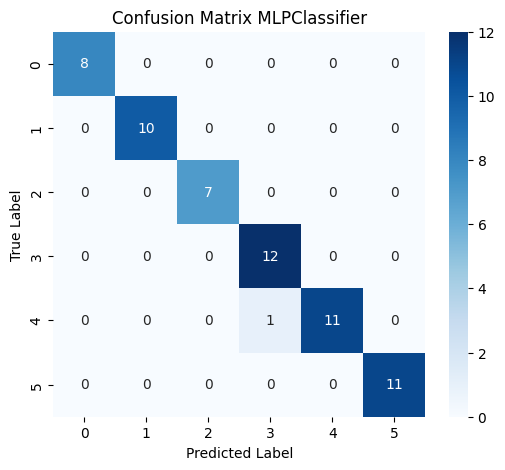

In [53]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix MLPClassifier")
plt.show()

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.stats import norm

In [55]:
df_ready = df.drop(columns=["Star color", "Spectral Class"])

In [57]:
X = df_ready.drop(columns=["Star type"])
y = df_ready["Star type"]

In [60]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
def pnn_predict(X_train, y_train, X_test, sigma=0.1):
    classes = np.unique(y_train)
    y_pred = []

    for x in X_test:
        probs = []
        for c in classes:
            X_class = X_train[y_train == c]  # Ambil data dengan kelas tertentu
            prob = np.mean(norm.pdf(X_class - x, scale=sigma))  # Kernel Gaussian
            probs.append(prob)

        y_pred.append(classes[np.argmax(probs)])  # Pilih kelas dengan probabilitas tertinggi

    return np.array(y_pred)

In [61]:
y_pred = pnn_predict(X_train_scaled, y_train.to_numpy(), X_test_scaled)

In [62]:
accuracy = accuracy_score(y_test, y_pred)

In [63]:
print("\nTraining set score: {:.4f}".format(accuracy_score(y_train, pnn_predict(X_train_scaled, y_train.to_numpy(), X_train_scaled))))
print("Test set score: {:.4f}".format(accuracy))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Training set score: 0.8944
Test set score: 0.8167

Confusion Matrix:
[[ 8  0  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  0  7  0  0  0]
 [ 0  2  6  4  0  0]
 [ 1  0  0  0 11  0]
 [ 0  0  0  0  2  9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.83      1.00      0.91        10
           2       0.54      1.00      0.70         7
           3       1.00      0.33      0.50        12
           4       0.85      0.92      0.88        12
           5       1.00      0.82      0.90        11

    accuracy                           0.82        60
   macro avg       0.85      0.84      0.81        60
weighted avg       0.87      0.82      0.80        60



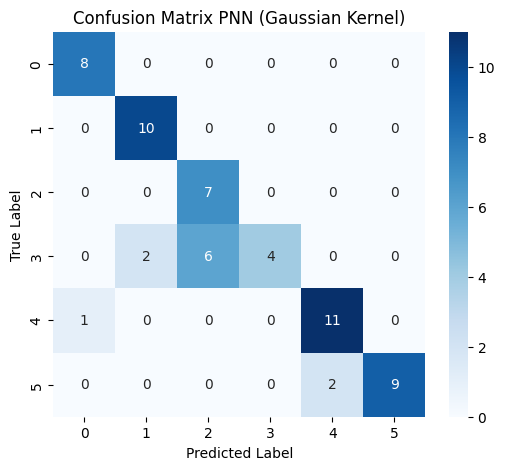

In [64]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix PNN (Gaussian Kernel)")
plt.show()